<div style="border:solid Chocolate 2px; padding: 40px">

<b>Андрей, привет!👋</b>

Меня зовут Александр Куимов, я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

# Определение возраста покупателей

План по выполнению проекта
- Провести исследовательский анализ набора фотографий.
- Подготовить данные к обучению.
- Обучить нейронную сеть и рассчитать её качество.
- Сделать выводы.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>  
    
Я бы посоветовал тебе подробнее раскрыть план своей работы. Это поможет тебе расставлять акценты в выводах.

<div class="alert alert-success">
<h2> Комментарий студента <a class="tocSkip"> </h2>
​
Дейстиветельно когда есть план не нужно думать где его достать). План добавил.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Вижу, хорошо.

## Исследовательский анализ данных

In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

print(labels.info())
print(labels.shape)

Found 7591 validated image filenames.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB
None
(7591, 2)


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Размер выборки выведен. Можно тут еще добавить несколько слов, большой ли он, и как это скажется при обучении модели.

In [3]:
features, target = next(train_gen_flow)
print(features.shape)
print(target.shape)

(32, 224, 224, 3)
(32,)


'График распределения возраста в выборке'

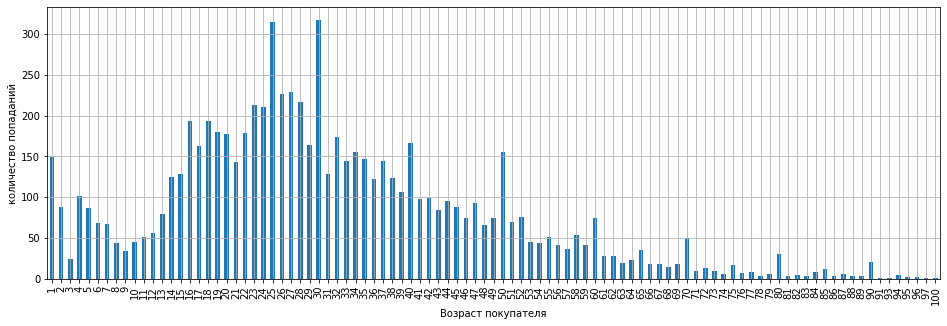

In [4]:
labels.groupby('real_age')['file_name'].count().plot(kind='bar', grid=True, figsize=(16,5))
plt.xlabel('Возраст покупателя')
plt.ylabel('количество попаданий')
plt.title;('График распределения возраста в выборке')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Гистограмма целевого признака выведена верно. Можно тут еще добавить, похоже ли распределение на простые, имеются ли "кластеры" и выбросы.

'График распределения возраста в выборке c сортировкой по количеству попаданий'

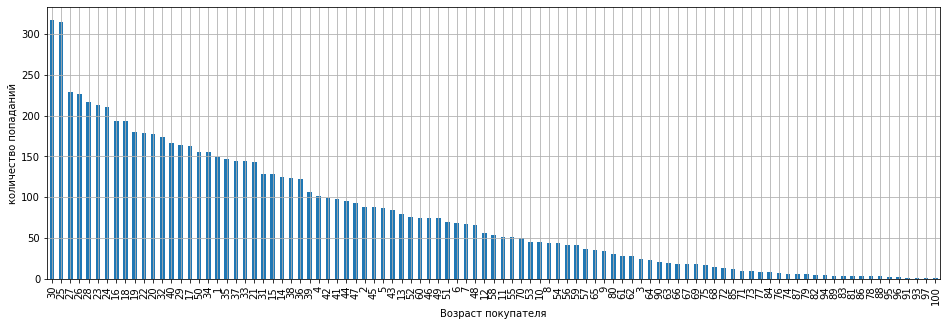

In [5]:
labels.groupby('real_age')['file_name'].count().sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(16,5))
plt.xlabel('Возраст покупателя')
plt.ylabel('количество попаданий')
plt.title;('График распределения возраста в выборке c сортировкой по количеству попаданий')

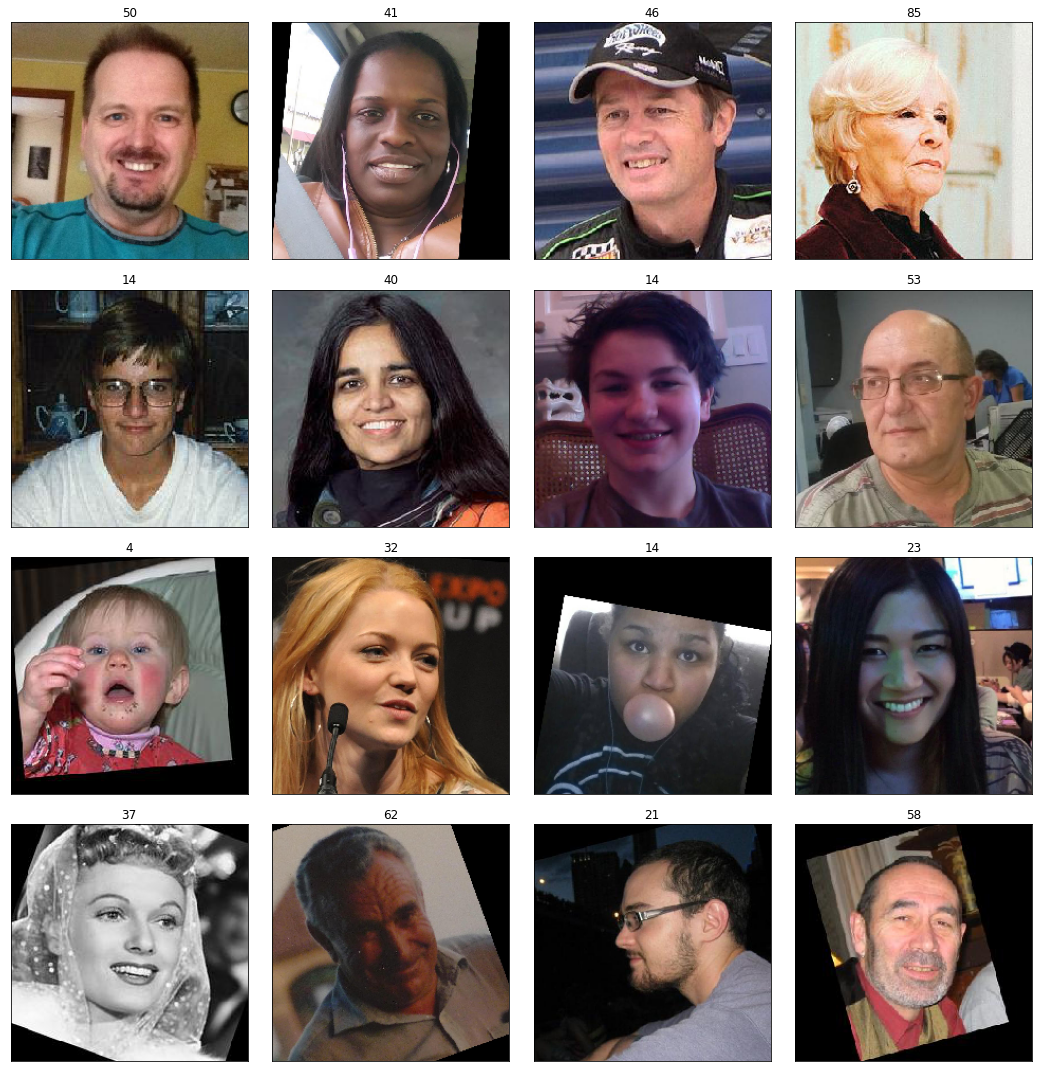

In [6]:
fig = plt.figure(figsize=(15,15))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.title(target[i])


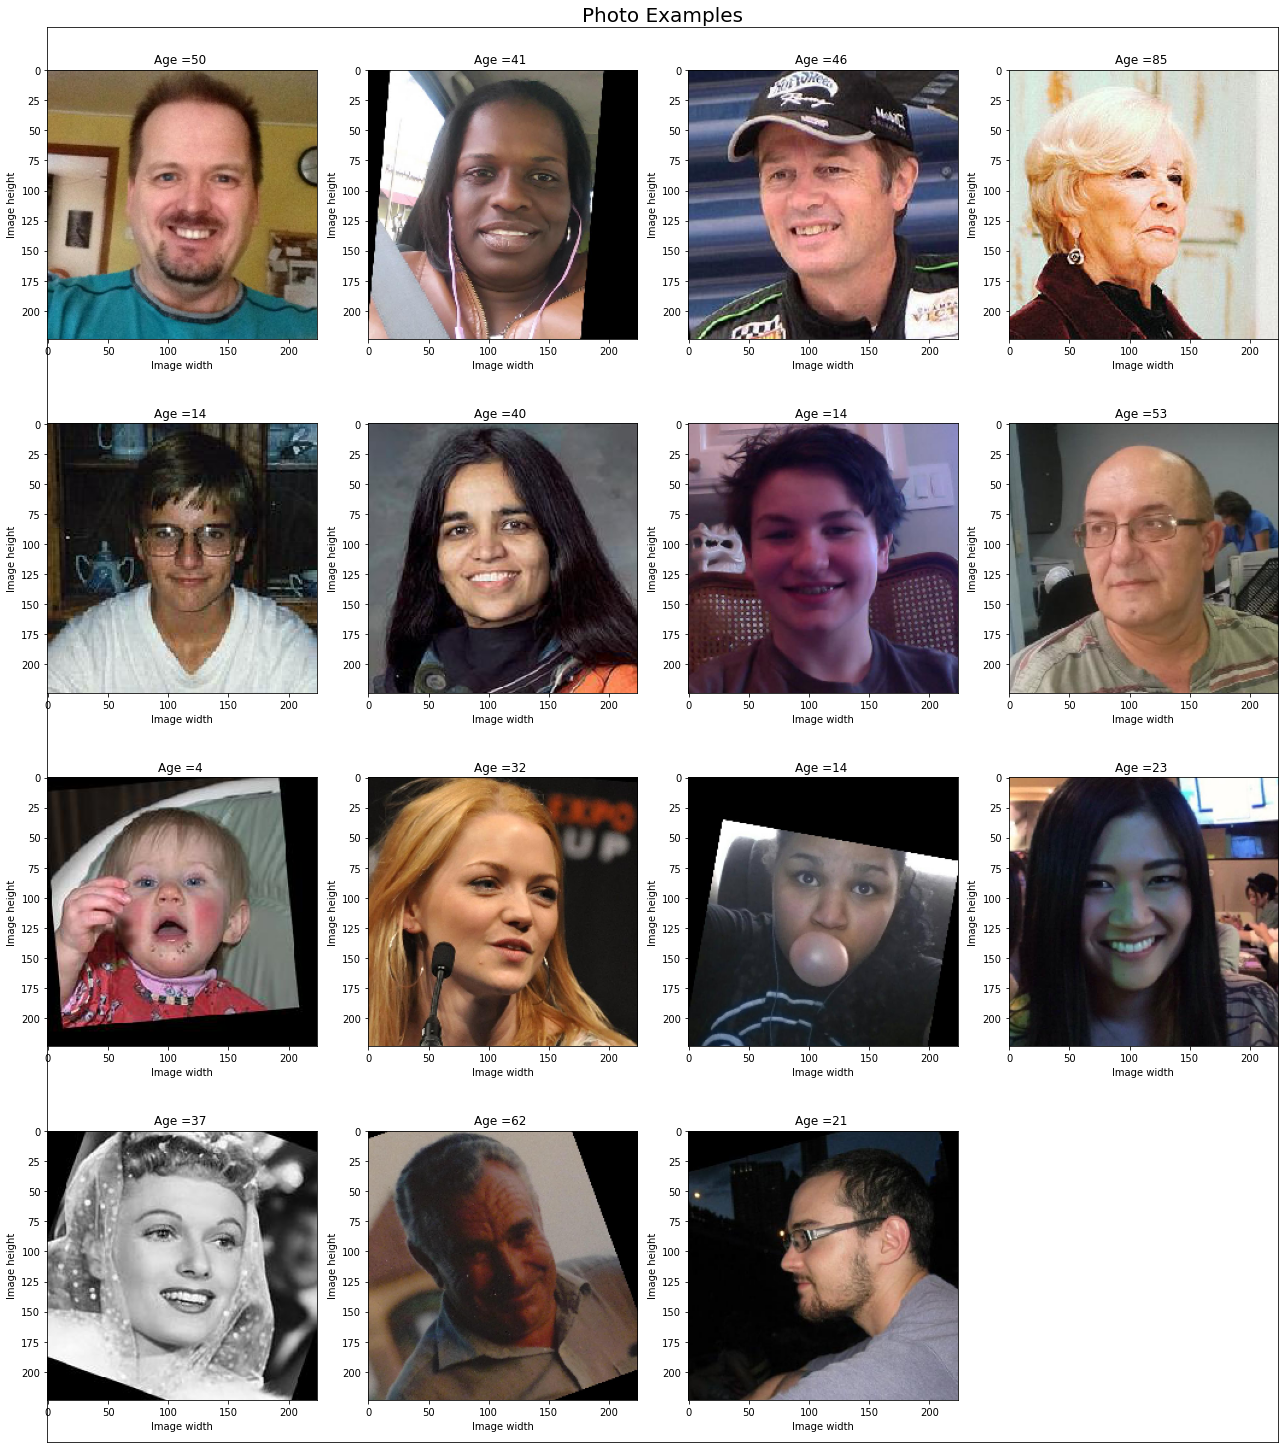

In [7]:
fig = plt.figure(figsize=(18,20))
plt.title('Photo Examples', {'fontsize': 20,
 'fontweight' : 10,
 'verticalalignment': 'baseline'})
plt.xticks([])
plt.yticks([])
plt.tight_layout()
for i in range(15):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.tight_layout() 
    plt.title('Age ={} '.format(target[i]), loc='center')    
    plt.xlabel('Image width')
    plt.ylabel('Image height')

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Желательно еще поработать над оформлением графика (название осей и самого графика). В названиях (title) изображений можно указать возраст.

<div class="alert alert-success">
<h2> Комментарий студента <a class="tocSkip"> </h2>

В названиях указал возраст. не совсем понимаю зачем называть оси на фотографиях и какие названия им можно дать?
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Хорошо, назвать оси желательно для лучшей визуализации. Можно было вывести с осями так, пример ниже:
        

        
Код ревьюера:
```python
features, target = next(train_gen_flow)

# выводим 15 изображений

fig = plt.figure(figsize=(18,20))
plt.title('Photo Examples', {'fontsize': 20,
 'fontweight' : 10,
 'verticalalignment': 'baseline'})
plt.xticks([])
plt.yticks([])
plt.tight_layout()
for i in range(15):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.tight_layout() 
    plt.title('Age ={} '.format(target[i]), loc='center')    
    plt.xlabel('Image width')
    plt.ylabel('Image height')

```


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Тут следует еще добавить вывод, и указать, какова общая ориентация фотографий (нужно ли их поворачивать), есть ли черно-белые фотографии, различается ли размер изображений?
Добавь, пожалуйста.
 </div>

<div class="alert alert-success">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Вывод был, видимо не сохранился. Все исправил
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
- Верно, в данных есть черно-белые фотографии. 
- Фотографии уже повернуты к примерно одинаковой ориентации (нет повернутых вверх ногами) и мы приведем их перед обучением к одному размеру.

При анализе выведенных фотографий можно сделать следующие выводы. Часть фото с неправильной ориентацией, возможно при обучении модели нужно будет их повернуть. Часть фото черно белые. Некоторые фотографии не четкие. Попадаются фото с закрытой частью лица каким либо предметом или лицо повернуто от камеры. Попадаются и пересвеченные фоторгафии. На некоторых фотографиях встречаются сразу несколько фактороф. Все эти факторы могут повлиять на качество определения возраста. Возможно в процессе обучения эти факторы нужно будет исправлять.

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pandas as pd



def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(validation_split=0.25, horizontal_flip=True, rescale=1./255)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow

def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow


def create_model(input_shape):
    optimizer = Adam(lr=0.0001)
    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet', 
                    include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['mae'])
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=10,
                steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, 
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

```

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Модель определена правильно!
        
Cейчас у тебя созданы генераторы с одинаковым именем. Следует создать отдельные генераторы с разными именами. Так будет лучше читаемость кода.

<div class="alert alert-success">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Исправил
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Молодец)

```

Train for 356 steps, validate for 119 steps
Epoch 1/10
356/356 - 68s - loss: 213.0921 - mae: 10.5268 - val_loss: 479.3912 - val_mae: 16.7521
Epoch 2/10
356/356 - 38s - loss: 84.4166 - mae: 6.9928 - val_loss: 179.3047 - val_mae: 10.1406
Epoch 3/10
356/356 - 38s - loss: 57.6594 - mae: 5.8194 - val_loss: 163.1404 - val_mae: 9.8480
Epoch 4/10
356/356 - 38s - loss: 42.0161 - mae: 4.9324 - val_loss: 92.2422 - val_mae: 7.2924
Epoch 5/10
356/356 - 38s - loss: 31.4126 - mae: 4.3179 - val_loss: 69.2645 - val_mae: 6.1485
Epoch 6/10
356/356 - 38s - loss: 26.8961 - mae: 3.9563 - val_loss: 68.0891 - val_mae: 6.1612
Epoch 7/10
356/356 - 38s - loss: 19.2892 - mae: 3.3502 - val_loss: 93.5333 - val_mae: 7.1822
Epoch 8/10
356/356 - 38s - loss: 16.5899 - mae: 3.0899 - val_loss: 70.6100 - val_mae: 6.2839
Epoch 9/10
356/356 - 38s - loss: 13.9538 - mae: 2.8283 - val_loss: 72.6322 - val_mae: 6.4883
Epoch 10/10
356/356 - 38s - loss: 12.3851 - mae: 2.6793 - val_loss: 64.3977 - val_mae: 5.9204
119/119 - 9s - loss: 64.3977 - mae: 5.9204
Test MAE: 5.9204
```

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отличный результат по метрике)

## Анализ обученной модели

Для обучения была выбрана последовательная модель Sequential. Модель была создана с применением архитектуры ResNet50. Для создания модели были применены 3 слоя: 1. Слой ResNet 2. Вспомогательный слой GlobalAveragePooling2D 3. Полносвязный слой Dense. В качестве оптимизатора был применен Adam с learning_rate=0.0001. В качастве активатора был применен спрямленный линейный блок "relu". Для уменьшения времени обучения в качестве функции потерь была использована MSE. На тестовой выборке удалось достичь МАЕ = 5.9. Данная модель позволила достичь достаточно высокой степени распознования возраста по фотографиям. 

Бизнес этой модели хочет поставить две задачи это 

1. Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы. Пологаю, что с такой задачей данная модель справится так как тут не нужно 100% попадание в возраст, а так же предпологается деление на категории. 

2. Контролировать добросовестность кассиров при продаже алкоголя. тут я думаю могут возникуть проблемы т.к. модель наврятли сможет отличить человека кототорому 17 лет и условно 8 месяцев от 18ти летнего. Понятно что такой моделью можно будет пресечь продажу алкоголя совсем юным покупателям, но следовать букве закона думаю не получиться. 

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

- Пожалуйста, подробнее опиши использованную модель и параметры.
- Можно было еще сказать несколько слов о бизнесе. Позволяет ли полученная модель решить поставленные бизнесом задачи?
      

<div class="alert alert-success">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Вывод дополнил.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Выводы вполне логичные)

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.1 <a class="tocSkip"> </h2>    
    
  
Андрей,    
у меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с проектом. Молодец! Загружены данные для анализа, изучен каждый параметр, модель построена и протестирована. Тебе удалось успешно справиться с первой задачей в области компьютерного зрения. Поздравляю!
    
Отмечу отдельные положительные моменты проекта🙂:
    
- радует, что проект хорошо структурирован, приятно проверять такие работы;
- есть красивые визуализации в проекте.
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть. 
Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства:

- Указать в выводе, какова общая ориентация фотографий (нужно ли их поворачивать), есть ли черно-белые фотографии, различается ли размер изображений.
- Исправить выводы при необходимости.
    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.2 <a class="tocSkip"> </h2>    
    
     
  
Андрей, теперь почти идеально, молодец! Принимаю твой проект)
    
    
В этом проекте все шаги отработаны. С интересом читал твои размышления, код и выводы. Что ещё для дальнейшего улучшения качества возможно сделать?
    
Опишу здесь некоторые идеи:
    
1. Качество данных на входе: оценить еще раз возраст по фото, возможно в выборке есть выбросы.
2. Анализ ошибок: к примеру модель сильно ошибается на сегменте пожилых людей, зато почти идеально работает с детьми. Тогда мы поймем, каких возрастов фото было бы хорошо добавить в выборку для дообучения.
3. Дополнительно изучить распределение целевого признака, возможно что выборка была составлена неслучайным образом (видна небольшая бимодальность), посмотреть, каких возрастных групп представлено мало, чтобы их потом добавить в выборку.
    
Но цель нашего проекта достигнута. Рад был тебе помочь)
    
Преподаватель в Slack будет рад помочь, если у тебя появятся вопросы. Удачи тебе в финальном проекте!
  
</div>